In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# %matplotlib inline
# Turn interactive plotting off
# plt.ioff()

In [17]:
percorso = os.getcwd()
percorso

#INPUT and OUTPUT FOLDERS
test_dir_path = 'C:\\Users\\miche\\Documents\\Università\\PhD\\test_waveforms\\fw'
indir_name = "data_tsv_file"
indir_path = os.path.join(test_dir_path,indir_name)
outdir_name = "images"
outdir_path = os.path.join(test_dir_path,outdir_name)

format = '.png'
row_to_plot = 7
remove_starting_noise = 0
highlight_start = 0
highlight_end = 0
lim = 50

### METADATA ###
encoding = 'iso8859' #read greek letters             
sampling = 50  #sampling frequency in MHz
s_period = 1/sampling  
length = 50  #acquisition window in microseconds


time = np.arange(0,sampling,s_period)



19_21_kn.bscan.tsv
[Time Scale]      | offset=0mus | scale=50mus | sample=2500 | sampling=0.02MHz



IndexError: invalid index to scalar variable.

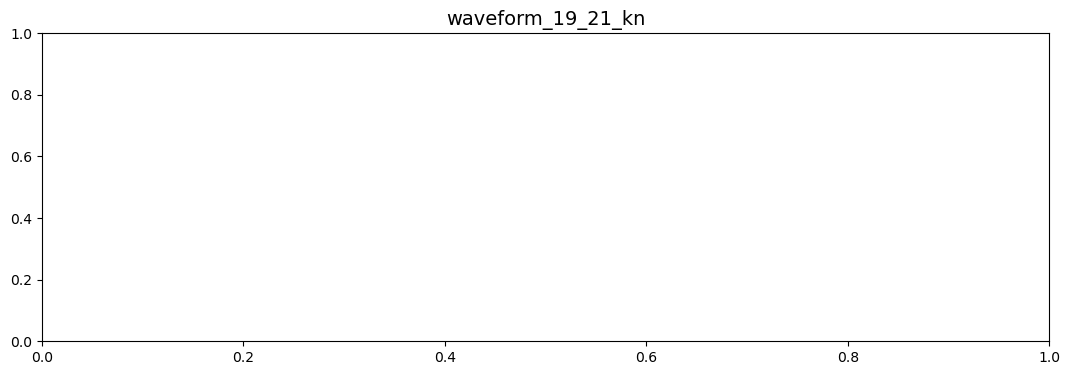

In [21]:

for infile_name in os.listdir(indir_path):
    
    print(infile_name)

    ### IMPORT DATA ###
    file_path = os.path.join(indir_path, infile_name)
    # data = pd.read_csv(file_path, encoding = encoding, sep = '\t', skiprows = 4, header = None).dropna()

    with open(file_path,"rb") as infile:
        general = next(infile).decode(encoding)
        amplitude_scale = next(infile).decode(encoding)
        time_scale = next(infile).decode(encoding)
        print(time_scale)           # check what is going on below
        stupid_scale = next(infile).decode(encoding)


        # DEFINE TIME SCALE USING METADATA
        time_info = re.findall(r"\d+\.*\d*",time_scale)   # find all float in the string "time_scale" using regular expression:
                                                    # the first argument of findall must be a "regular expression". It start with an r so
                                                    # is an r-string, that means "\" can be read as a normal character
                                                    # The regular expression "\d+\.*\d*" means "match all the digits that are adiacent as
                                                    # a single entry and, if they are followed by a dot and some other digits, they are still
                                                    # the same numbers". So it gets as a single number both 1, 10, 1.4, 10.42 etc.

        time_info = [float(entry) for entry in time_info]           # just convert the needed info in float number
        time = np.arange(time_info[0],time_info[1],time_info[3])    


        data = np.genfromtxt(file_path, encoding=encoding , skip_header=4)
        data = data[~np.isnan(data)]

        
        # CHOOSE THE FILE PATH OF THE OUTPUT
        infile_name = infile_name.split('.')[0]    # remove extension


        outfile_name = "_".join(("waveform",infile_name))
        outfile_path = os.path.join(outdir_path, outfile_name)

            ### PLOT DATA ###
        f = plt.figure(figsize = (13,4))
        plt.title(outfile_name, fontsize = 14) 
        plt.plot(time[remove_starting_noise:], data[row_to_plot][remove_starting_noise:], color = 'cornflowerblue')
        plt.plot(time[highlight_start:highlight_end], data[row_to_plot][highlight_start:highlight_end], color = 'red')
        plt.xlabel('Time [$\mu s$]', fontsize = 12)
        plt.ylabel('Amplitude [.]', fontsize = 12)
        plt.ylim(-lim,lim)
        plt.savefig(outfile_path + format, dpi = 300)
        plt.close()
                    
        print(outfile_path)

        
        